# 📐 **Chapter 4 - Training Models**

## *Linear Regression*

### a. Implementasi via *Normal Equation*

> Menghitung $\hat{\theta} = (X^T X)^{-1} X^T y$. <br>

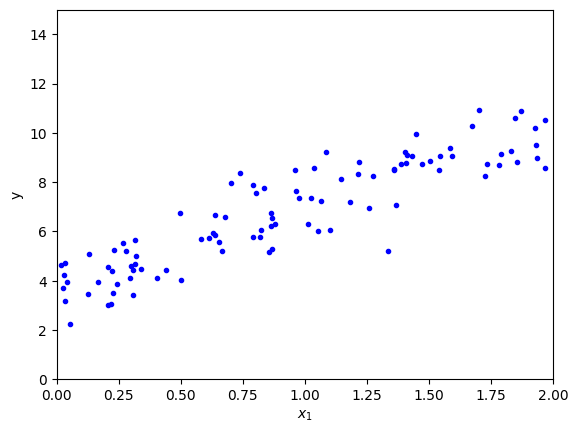

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("y")
plt.axis([0, 2, 0, 15])
plt.show()

In [3]:
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[3.71976819]
 [3.31817698]]


In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((X_new.shape[0], 1)), X_new]
y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[ 3.71976819]
 [10.35612215]]


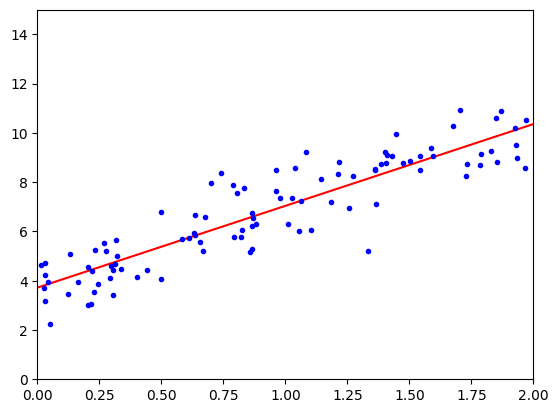

In [5]:
plt.plot(X_new.ravel(), y_predict.ravel(), "r-")
plt.plot(X.ravel(), y.ravel(), "b.")
plt.axis([0, 2, 0, 15])
plt.show()

### b. Implementasi via *Scikit-Learn*

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print("Intercept (Scikit-Learn):", lin_reg.intercept_)
print("Koefisien (Scikit-Learn):", lin_reg.coef_)

print("\nPrediksi (Scikit-Learn):")
print(lin_reg.predict(X_new))

Intercept (Scikit-Learn): [3.71976819]
Koefisien (Scikit-Learn): [[3.31817698]]

Prediksi (Scikit-Learn):
[[ 3.71976819]
 [10.35612215]]


## *Gradient Descent* (GD)

### a. *Batch Gradient Desccent*

In [9]:
eta = 0.1
n_iterations = 1000 
m = 100 

theta = np.random.randn(2, 1)

for iteration in range(n_iterations): 
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    
    theta = theta - eta * gradients

print("Theta terbaik (dari Batch GD):")
print(theta)

Theta terbaik (dari Batch GD):
[[3.71976819]
 [3.31817698]]


> Hasilnya harusnya sama dengan *Normal Equation* <br>

### b. *Stochastic Gradient Descent* (SGD)

In [10]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        
        eta = learning_schedule(epoch * m + i)
        
        theta = theta - eta * gradients

print("Theta terbaik (dari SGD):")
print(theta)

Theta terbaik (dari SGD):
[[3.74802844]
 [3.32945712]]


> Hasilnya harusnya mendekati dan tidak identik dengan *Normal Equation*<br>

### c. SGD Menggunakan *Scikit-Learn*

In [11]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)

sgd_reg.fit(X, y.ravel())

print("Intercept (SGD Scikit-Learn):", sgd_reg.intercept_)
print("Koefisien (SGD Scikit-Learn):", sgd_reg.coef_)

Intercept (SGD Scikit-Learn): [3.71046673]
Koefisien (SGD Scikit-Learn): [3.31219007]


## *Polynomial Regression*

### *Generate* Data *Non-Linear*

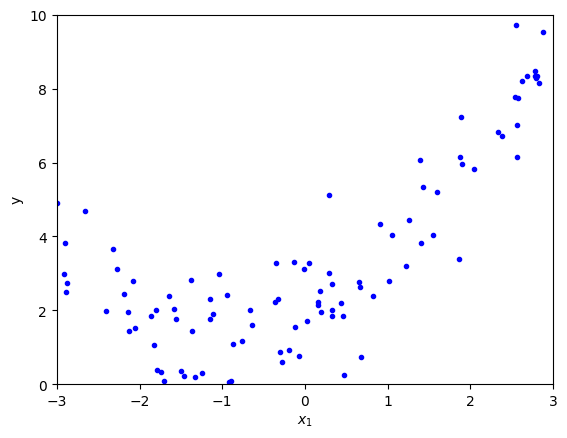

In [12]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("y")
plt.axis([-3, 3, 0, 10])
plt.show()

### Transformasi Data Training

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

print("Data asli X[0]:", X[0])
print("Data transformasi X_poly[0]:", X_poly[0])

# Latih LinearRegression pada data yang telah ditransformasi
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

print("\nIntercept (Polynomial):", lin_reg.intercept_)
print("Koefisien (Polynomial):", lin_reg.coef_)
# Koefisien akan mendekati [1, 0.5], sesuai fungsi aslinya

Data asli X[0]: [-2.65914339]
Data transformasi X_poly[0]: [-2.65914339  7.07104359]

Intercept (Polynomial): [1.85351968]
Koefisien (Polynomial): [[0.9925928  0.51198255]]


> Koefisien harusnya mendekati [1, 0.5] <br>
> Koefisien akan sesuai dengan fungsi awal <br>

## 4. *Learning Curves*

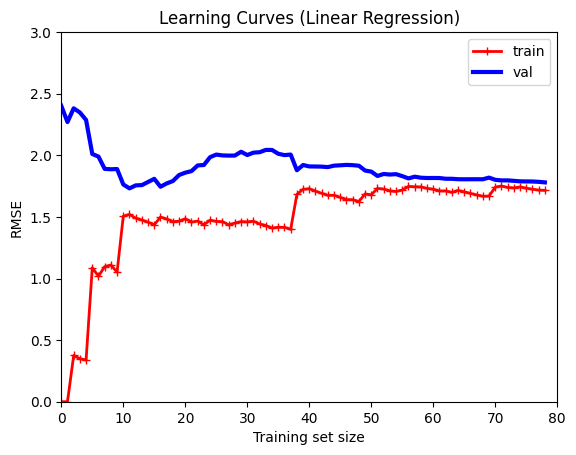

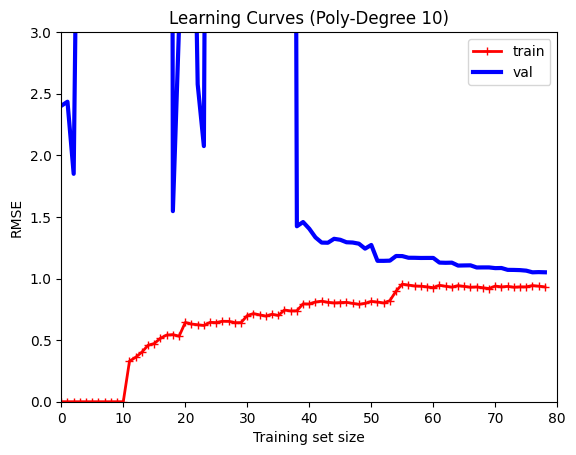

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []

    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)

        train_errors.append(mean_squared_error(y_train[:m], y_train_predict)) 
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.title("Learning Curves (Linear Regression)")
plt.axis([0, 80, 0, 3])
plt.show()

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)
plt.title("Learning Curves (Poly-Degree 10)")
plt.axis([0, 80, 0, 3])
plt.show()

> Pada graf linear, model menunjukkan *underfitting*.<br>
> *Underfitting* ditunjukkan pada kemampuan model ketika dimasukkan data val. <br>
> Pada awalnya, model tidak dapat melakukan generalisasi pada data val. <br>

> Pada graf derajat 10, model menunjukkan *overfitting*. <br>
> *Overfitting* ditunjukkan pada gap RMSE training yang rendah dibandingkan dengan RMSE val.<br>

### 5. *Regularized Linear Models*

> Berfungsi untuk mengurangi *overfitting* pada model yang terlalu kompleks dengan membatasi bobot model. <br>
> Model regularisasi **sensitif terhadap skala fitur**, jadi perlu menggunakan *StandardScaler*

In [19]:
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5

pipe_poly_scaled = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("std_scaler", StandardScaler())
])
X_poly_scaled = pipe_poly_scaled.fit_transform(X)

### a. *Ridge Regression* (*L2 Penalty*)

> Menambahkan term regularisasi $\alpha \sum_{i=1}^{n} \theta_i^2$ ke cost function. <br>

In [21]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X_poly_scaled, y)
print("Prediksi Ridge (alpha=1):", ridge_reg.predict(pipe_poly_scaled.transform([[1.5]])))

sgd_reg_ridge = SGDRegressor(penalty="l2") 
sgd_reg_ridge.fit(X_poly_scaled, y.ravel())
print("Prediksi Ridge (SGD):", sgd_reg_ridge.predict(pipe_poly_scaled.transform([[1.5]])))

Prediksi Ridge (alpha=1): [1.40043119]
Prediksi Ridge (SGD): [1.21788728]


### b. *Lasso Regression* (*L1 Penalty*)

> Menambahkan regularisasi $\alpha \sum_{i=1}^{n} |\theta_i|$ ke fungsi *cost*. <br>
> Cenderung membuat bobot fitur tidak penting menjadi nol. <br>

In [22]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_poly_scaled, y)
print("Prediksi Lasso (alpha=0.1):", lasso_reg.predict(pipe_poly_scaled.transform([[1.5]])))

sgd_reg_lasso = SGDRegressor(penalty="l1")
sgd_reg_lasso.fit(X_poly_scaled, y.ravel())
print("Prediksi Lasso (SGD):", sgd_reg_lasso.predict(pipe_poly_scaled.transform([[1.5]])))

Prediksi Lasso (alpha=0.1): [1.40979379]
Prediksi Lasso (SGD): [1.22986039]


### c. *Elastic Net*

> Campuran *Ridge* dan *Lasso*. <br>
> Mencari keseimbangan antara keduanya. <br>

In [25]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

y_target = y
if y_target.shape[0] != X_poly_scaled.shape[0]:
	y_target = np.ravel(y_target)[: X_poly_scaled.shape[0]]

elastic_net.fit(X_poly_scaled, y_target)
print("Prediksi ElasticNet:", elastic_net.predict(pipe_poly_scaled.transform([[1.5]])))

Prediksi ElasticNet: [164.29925629]


### d. *Early Stopping*

In [29]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.base import clone

X_train, X_val, y_train, y_val = train_test_split(X_poly_scaled, y_target, test_size=0.2)

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train, y_train)
    y_val_predict = sgd_reg.predict(X_val)
    val_error = mean_squared_error(y_val, y_val_predict)

    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

print("\n--- Early Stopping ---")
print("Epoch terbaik:", best_epoch)
print("Validation Error minimum:", minimum_val_error)
print(best_model)


--- Early Stopping ---
Epoch terbaik: 951
Validation Error minimum: 797.3213120182143
SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             tol=None, warm_start=True)


## *Logistic Regression* (Klasifikasi Biner)

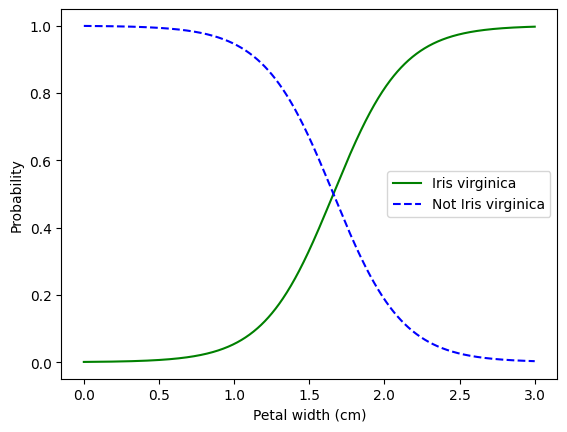

Prediksi untuk 1.7cm: [1]
Prediksi untuk 1.5cm: [0]


In [31]:
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()
X = iris["data"][:, 3:]  
y = (iris["target"] == 2).astype(int) 

log_reg = LogisticRegression()
log_reg.fit(X, y)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend()
plt.show()

print("Prediksi untuk 1.7cm:", log_reg.predict([[1.7]]))
print("Prediksi untuk 1.5cm:", log_reg.predict([[1.5]]))

## *Softmax Regression* (Klasifikasi *Multiclass*)

In [32]:
X = iris["data"][:, (2, 3)]  
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

test_flower = [[5, 2]]
print("Prediksi kelas:", softmax_reg.predict(test_flower))

print("Probabilitas kelas:", softmax_reg.predict_proba(test_flower))

Prediksi kelas: [2]
Probabilitas kelas: [[6.21626372e-07 5.73689802e-02 9.42630398e-01]]


c:\Users\mrafi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
